# HIV Time Series Classification
To classify county level time series HIV data in the US 

Created at The University of Illinois CyberGIS Center. Created: 12/28/2021. Last updated: 1/05/2022.

## Notebook Outline
- [Data preparation](#Data_preparation)
- [Data visualization](#Data_visualization)
- [Model set up](#Model_setup)

In [21]:
import sys
import argparse
import os
import pandas as pd
import datetime as dt
from datetime import timedelta
from datetime import datetime
import numpy as np
import json
import geopandas as gpd
from urllib.request import urlopen
import matplotlib.pyplot as plt

<a id = 'Data_preparation'></a>
### Data preparation
The original data is in js format. We want to parse it into csv format for further processing.


In [22]:
with open('HIV_classification/data/VARIABLES_HIV_PCP.js') as f:
    lines = f.readlines()

def parse_string1(input_string):
    input_string = input_string[3:-4]
    item_list = input_string.split(',')

    item_list[0] = str(item_list[0][1:-1])
    for i in range(1, len(item_list)):
        item_list[i] = str(item_list[i][1:])[1:-1]
    
    return item_list
    
def parse_string2(input_string):
    input_string = input_string[3:-4]
    item_list = input_string.split(',')
    
    item_list[0] = int(item_list[0])
    for i in range(1, len(item_list)):
        item_list[i] = float(item_list[i][1:])
    
    return item_list


In [23]:
df_list = []
df_list.append(parse_string1(lines[2]))
for i in range(3, len(lines) - 1):
    # print(i)
    df_list.append(parse_string2(lines[i]))

df_list
df = pd.DataFrame(df_list[1:])
df.columns = df_list[0]
df.head()

,geoid,2012_Health Care Center (/100k pop),2013_Health Care Center (/100k pop),2014_Health Care Center (/100k pop),2015_Health Care Center (/100k pop),2016_Health Care Center (/100k pop),2017_Health Care Center (/100k pop),2018_Health Care Center (/100k pop),2019_Health Care Center (/100k pop),2020_Health Care Center (/100k pop),...,2013_HIV Rate,2014_HIV Rate,2015_HIV Rate,2016_HIV Rate,2017_HIV Rate,2018_HIV Rate,2019_HIV Rate,2020_HIV Rate,2021_HIV Rate,2022_HIV Rat
0,1001,3.796153,3.805350,3.800229,3.801876,3.799508,3.796495,3.993171,4.207355,4.438731,...,7.24,15.40,11.00,10.90,21.60,7.17,9.4,7.9,6.5,6.5
1,1003,2.507915,2.477267,2.448810,2.427088,2.398678,2.743151,2.958864,3.191741,3.441472,...,6.70,9.50,8.80,8.00,6.10,5.40,6.0,5.5,5.0,4.0
2,1005,6.641990,6.657304,6.680661,6.730663,6.798240,6.891091,7.031839,7.191107,7.368559,...,14.77,11.16,11.33,15.41,15.83,28.30,15.4,15.6,14.9,12.8
3,1007,4.207311,4.215246,4.215808,5.951880,5.943989,5.940711,6.098635,6.274768,6.468781,...,0.00,13.33,17.71,17.67,25.90,17.63,16.9,14.2,12.2,11.5
4,1009,2.630077,2.629031,2.632514,2.633563,2.632856,2.625834,2.843667,3.078626,3.330401,...,5.18,6.93,10.40,6.93,6.90,5.14,6.7,6.4,6.5,6.5


In [25]:
df = df[df.columns[-11:]]
df.head()

,2012_HIV Rate,2013_HIV Rate,2014_HIV Rate,2015_HIV Rate,2016_HIV Rate,2017_HIV Rate,2018_HIV Rate,2019_HIV Rate,2020_HIV Rate,2021_HIV Rate,2022_HIV Rat
0,15.50,7.24,15.40,11.00,10.90,21.60,7.17,9.4,7.9,6.5,6.5
1,7.50,6.70,9.50,8.80,8.00,6.10,5.40,6.0,5.5,5.0,4.0
2,14.71,14.77,11.16,11.33,15.41,15.83,28.30,15.4,15.6,14.9,12.8
3,17.70,0.00,13.33,17.71,17.67,25.90,17.63,16.9,14.2,12.2,11.5
4,6.92,5.18,6.93,10.40,6.93,6.90,5.14,6.7,6.4,6.5,6.5


<a id = 'Data_visualization'></a>
### Data visualization
Plot the time series HIV data

Text(0.5, 0, 'year')

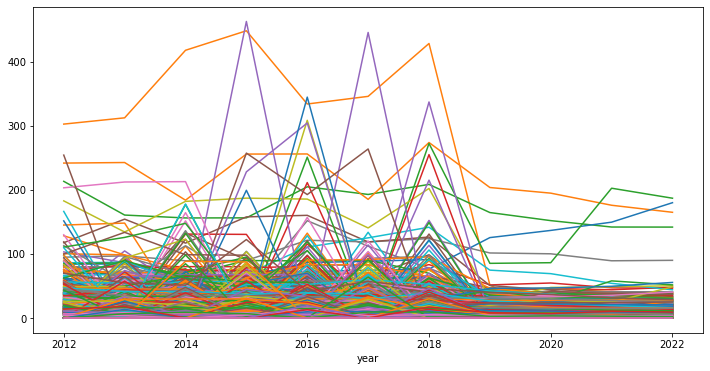

In [47]:
plt.figure(figsize = (12, 6))
for i in range(len(df)):
    for j in range(len(df.iloc[i])):
        if df.iloc[i][j] == -9999 or df.iloc[i][j] > 500 or df.iloc[i][j] < -500:
            df.iloc[i][j] = 0
    plt.plot([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], df.iloc[i])
plt.xlabel('year')


<a id = 'Model_set_up'></a>
### Model set up